# Python Realisation of Section 4.6 in Notes
Marginals:
$$
\begin{align}
R^S &= X_1 = Z + Z_1\\
R^F &= X_2 = Z + Z_2\\
\end{align}
$$
where 
$
Z \bot Z_1 \bot Z_2
$ (bad notation... should be mutually independent)


$$Z \sim \text{NIG}(\alpha, \beta, 0, \delta)$$
$$Z_1 \sim \text{NIG}(\alpha, \beta, 0, \delta_1)$$
$$Z_2 \sim \text{NIG}(\alpha, \beta, 0, \delta_2)$$
so
$$
X_1 \sim \text{NIG}(\alpha, \beta, 0, \delta + \delta_1)\\
X_2 \sim \text{NIG}(\alpha, \beta, 0, \delta + \delta_2)
$$
We have
$$
\begin{align}
R^h &= X_1 - hX_2 \\
&= Z + Z_1-hZ-hZ_2\\
&= (1-h)Z + Z_1 -hZ_2
\end{align}
$$

By convolution of probability density:
$$f_{Z_1 - hZ_2}(z) = \int_{-\infty}^\infty f_{Z_1}(x) \cdot f_{-hZ_2}(z-x) dx$$
$$\begin{align}
f_{R^h}(r) &= \int_{-\infty}^\infty f_{(1-h)Z}(y) \cdot f_{Z_1 - hZ_2}(r-y)dy\\
&=\int_{-\infty}^\infty f_{(1-h)Z}(y)\int_{-\infty}^\infty f_{Z_1}(x) \cdot f_{-hZ_2}(r-y-x) dxdy\\
&=\int_{-\infty}^\infty \int_{-\infty}^\infty f_{(1-h)Z}(y) \cdot f_{Z_1}(x) \cdot f_{-hZ_2}(r-y-x) dxdy
\end{align}$$

In [1]:
from toolbox import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
np.set_printoptions(precision=4,suppress=True)

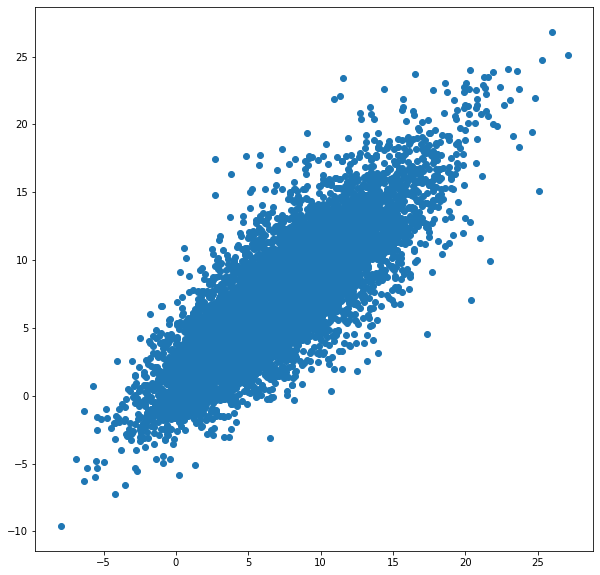

In [2]:
alpha  = 1
beta   = 0.5
gamma = np.sqrt(alpha**2 - beta**2)
mu     = 0
delta  = 10
delta1 = 2
delta2 = 2
size = 10000
h = 0.95

Z_law  = norminvgauss(alpha, beta, mu, delta)
Z1_law = norminvgauss(alpha, beta, mu, delta1)
Z2_law = norminvgauss(alpha, beta, mu, delta2)

Z  = Z_law.rvs(size)
Z1 = Z1_law.rvs(size)
Z2 = Z2_law.rvs(size)

X1 = Z + Z1
X2 = Z + Z2

X1_law = norminvgauss(alpha, beta, mu, delta+delta1)
X2_law = norminvgauss(alpha, beta, mu, delta+delta2)

Rh = X1 - h*X2 

Z_law_transformed  = norminvgauss(alpha, beta, mu, delta,  {"a":1-h, "b":0})
Z2_law_transformed = norminvgauss(alpha, beta, mu, delta2, {"a": -h, "b":0})

plt.figure(figsize=(10,10))
plt.scatter(X1, X2)

In [4]:
def f_Rh(r):
    integrand = lambda x,y,r: Z_law_transformed.pdf(y)*Z1_law.pdf(x)*Z2_law_transformed.pdf(r-y-x)
    integrand_fn = partial(integrand, r=r)
    return scipy.integrate.nquad(integrand_fn, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]


0.19054844896594417

In [5]:
%%time
x = np.linspace(-10,10,100)
results = np.ones(len(x))
for i in tqdm(range(len(x))):
    results[i] = f_Rh(x[i])

100%|██████████| 100/100 [01:04<00:00,  1.55it/s]

CPU times: user 1min 4s, sys: 168 ms, total: 1min 4s
Wall time: 1min 4s


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


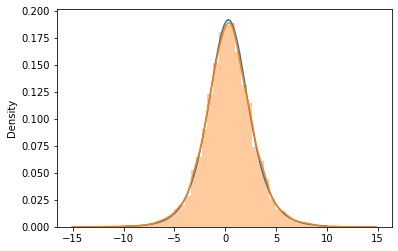

In [6]:
plt.plot(x, results)
sns.distplot(Rh)

$$\begin{align}
\phi_h(u) &:= \mathbb{E}\left(e^{iu R^h} \right)\\
&= 
\mathbb{E}\left[ e^{iu(1-h)Z}\right] \cdot
\mathbb{E}\left[ e^{iuZ_1}\right] \cdot
\mathbb{E}\left[ e^{-iuhZ_2}\right]\\
&= 
\phi_{(1-h)Z}(u) \cdot
\phi_{Z_1}(u) \cdot
\phi_{-hZ_2}(u)
\end{align}$$

In [7]:
def f_Rh_CF(r):
    CF = lambda u: Z_law_transformed.CF(u) * Z1_law.CF(u) * Z2_law_transformed.CF(u)
    integrand = lambda u, r: np.exp(-1j*u*r)*CF(u)
    integrand_fn = partial(integrand, r=r)
    return scipy.integrate.quad(integrand_fn, -np.inf, np.inf)[0]/(2*np.pi)

In [8]:
%%time
x = np.linspace(-10,10,100)
results = np.ones(len(x))
for i in tqdm(range(len(x))):
    results[i] = f_Rh_CF(x[i])

  0%|          | 0/100 [00:00<?, ?it/s]/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:450: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
100%|██████████| 100/100 [00:01<00:00, 81.97it/s]

CPU times: user 1.21 s, sys: 11.5 ms, total: 1.22 s
Wall time: 1.22 s


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


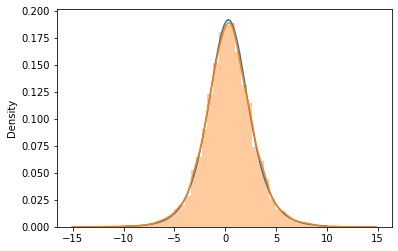

In [9]:
plt.plot(x, results)
sns.distplot(Rh)

## Method of Moments


In [64]:
import sympy as sym
from sympy.utilities.lambdify import lambdastr, lambdify

$$\begin{align}
\phi_h(u) &:= \mathbb{E}\left(e^{iu R^h} \right)\\
&= 
\mathbb{E}\left[ e^{iu(1-h)Z}\right] \cdot
\mathbb{E}\left[ e^{iuZ_1}\right] \cdot
\mathbb{E}\left[ e^{-iuhZ_2}\right]\\
&= 
\phi_{(1-h)Z}(u) \cdot
\phi_{Z_1}(u) \cdot
\phi_{-hZ_2}(u)
\end{align}$$

In [65]:
a,b,m,d,d1,d2,z,h,g= sym.symbols('a b m d d1 d2 z h g')

MGF0 = sym.exp((1-h)*m*z + sym.Abs(1-h)*d*\
               (sym.sqrt( (a/sym.Abs(1-h))**2 - (b/(1-h))**2)-\
                sym.sqrt( (a/sym.Abs(1-h))**2 - (b/(1-h)+z)**2)))

MGF1 = sym.exp(m*z+ d1*(sym.sqrt(a**2-b**2) - sym.sqrt(a**2-(b+z)**2)))

MGF2 = sym.exp((-h)*m*z+ sym.Abs(-h)*d2*\
               (sym.sqrt((a/sym.Abs(-h))**2 - (b/(-h))**2) -\
                sym.sqrt((a/sym.Abs(-h))**2-(b/(-h) +z)**2)))

mu1 = sym.diff(MGF0*MGF1*MGF2,z,1).subs({z:0})
mu2 = sym.diff(MGF0*MGF1*MGF2,z,2).subs({z:0})
mu3 = sym.diff(MGF0*MGF1*MGF2,z,3).subs({z:0})
mu4 = sym.diff(MGF0*MGF1*MGF2,z,4).subs({z:0})
mu5 = sym.diff(MGF0*MGF1*MGF2,z,5).subs({z:0})
mu6 = sym.diff(MGF0*MGF1*MGF2,z,6).subs({z:0})

f1 = lambdify([a,b,m,d,d1,d2,h], mu1)
f2 = lambdify([a,b,m,d,d1,d2,h], mu2)
f3 = lambdify([a,b,m,d,d1,d2,h], mu3)
f4 = lambdify([a,b,m,d,d1,d2,h], mu4)
f5 = lambdify([a,b,m,d,d1,d2,h], mu5)
f6 = lambdify([a,b,m,d,d1,d2,h], mu6)

In [66]:
f1_fn = lambda arg: f1(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f2_fn = lambda arg: f2(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f3_fn = lambda arg: f3(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f4_fn = lambda arg: f4(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f5_fn = lambda arg: f5(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f6_fn = lambda arg: f6(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)

In [67]:
mu1_hat = np.mean(Rh)
mu2_hat = np.mean((Rh)**2)
mu3_hat = np.mean((Rh)**3)
mu4_hat = np.mean((Rh)**4)
mu5_hat = np.mean((Rh)**5)
mu6_hat = np.mean((Rh)**6)
# mu1_hat=0

NameError: name 'Rh' is not defined

In [ ]:
g_fn = lambda arg: np.array([f1_fn(arg)-mu1_hat, f2_fn(arg)-mu2_hat,
                             f3_fn(arg)-mu3_hat, f4_fn(arg)-mu4_hat,
                             f5_fn(arg)-mu5_hat, f6_fn(arg)-mu6_hat])

In [ ]:
opt_fn = lambda arg: g_fn(arg).T.dot(g_fn(arg))
# opt_fn = lambda arg: g_fn(arg).dot(g_fn(arg))


In [ ]:
results = scipy.optimize.fmin(opt_fn,
                              x0=(1,0.5,0,10,2,2),
                              xtol=1e-8, 
                              maxiter=1000000,
                              maxfun=40000)

In [ ]:
print(opt_fn(results),
results)

In [ ]:
opt_fn((0.9615,0.481,-0.0008,11.6705,1.8978,1.9473))
# opt_fn(results.x)

In [ ]:
arg = (1,0.5,0,10,2,2)
opt_fn(arg)

In [ ]:
f1_fn(arg)-mu1_hat

In [ ]:
f6_fn(arg)-mu6_hat

In [ ]:
opt_fn(results.x)

In [ ]:
alpha  = 1
beta   = 0.5
gamma = np.sqrt(alpha**2 - beta**2)
mu     = 0
delta  = 10
delta1 = 2
delta2 = 2

## CF Approximation

$$\begin{align}
\kappa_1 &= \mu\\
\kappa_2 &= \mu_2\\
\kappa_3 &= \mu_3\\
\kappa_4 &= \mu_4 - 3\mu^2_2\\
\kappa_5 &= \mu_5-10\mu_3\mu_2
\end{align}$$
where $\mu_r = \mathbb{E}[(X-\mu)^r]$ are centered moments.

In [ ]:
mu1_hat = np.mean(Rh)
mu2_hat = np.mean((Rh-mu1_hat)**2)
mu3_hat = np.mean((Rh-mu1_hat)**3)
mu4_hat = np.mean((Rh-mu1_hat)**4)
mu5_hat = np.mean((Rh-mu1_hat)**5)
mu6_hat = np.mean((Rh-mu1_hat)**6)

In [69]:
mu1_prime = sym.diff(MGF1, z, 1).subs({z:0})
mu2_prime = sym.diff(MGF1, z, 2).subs({z:0})
mu3_prime = sym.diff(MGF1, z, 3).subs({z:0})
mu4_prime = sym.diff(MGF1, z, 4).subs({z:0})
mu5_prime = sym.diff(MGF1, z, 5).subs({z:0})
mu6_prime = sym.diff(MGF1, z, 6).subs({z:0})

In [70]:
mu1 = mu1_prime
mu2 = sym.simplify(mu2_prime - mu1**2)
mu3 = mu3_prime - 3*mu1*mu2_prime + 2*mu1**3
mu4 = mu4_prime - 4*mu1*mu3_prime + 6*mu1**2*mu2_prime - 3*mu1**4
mu5 = mu5_prime - 5*mu1*mu4_prime + 10*mu1**2*mu3_prime - 10*mu1**3*mu2_prime + 4*mu1**5

In [71]:
# See if the centered moments by analytical solution match the sampled moments
NIG_law = norminvgauss(2,1,1,1)
NIG = NIG_law.rvs(10000000)
print(np.mean((NIG-np.mean(NIG))**5)
,lambdify([a,b,m,d1], mu5)(2,1,1,1))

12.712235578148121 12.768595782988143


In [72]:
# cumulants
k1 = mu1
k2 = mu2
k3 = mu3
k4 = mu4 - 3*mu2**2
k5 = mu5 - 10*mu3*mu2
k6 = mu6_prime - 6*mu5_prime*mu1 - 15*mu4_prime*mu2_prime + 30*mu4_prime*mu1**2 - 10*mu3_prime**2 + 120*mu3_prime*mu2_prime*mu1 -\
     120*mu3_prime*mu1**3 + 30*mu2_prime**3 - 270*mu2_prime**2*mu1**2 + 360*mu2_prime*mu1**4 - 120*mu1**6

# turn them into executional functions
k1_fn = sym.lambdify([a,b,m,d1], k1, modules="numpy")
k2_fn = sym.lambdify([a,b,m,d1], k2, modules="numpy")
k3_fn = sym.lambdify([a,b,m,d1], k3, modules="numpy")
k4_fn = sym.lambdify([a,b,m,d1], k4, modules="numpy")
k5_fn = sym.lambdify([a,b,m,d1], k5, modules="numpy")
k6_fn = sym.lambdify([a,b,m,d1], k6, modules="numpy")

In [75]:
import dill
dill.settings['recurse'] = True
import pickle
ks = {"k3":k3_fn, "k4":k4_fn, "k5":k5_fn}
dill.dump(ks, open("NIG_k3-k5_fn", 'wb'))
fs = dill.load(open("NIG_k3-k5_fn", 'rb'))
k3_fn = fs['k3']

In [278]:
# Cornish-Fisher Expansion with Five Cumulants
q = 0.05
Zq = stats.norm.ppf(q)

NIG_law = norminvgauss(2,1,1,1)
NIG_law.normalise()
sNIG_law = NIG_law.standardisedNIG

salpha = sNIG_law.alpha
sbeta  = sNIG_law.beta
smu    = sNIG_law.mu
sdelta = sNIG_law.delta

_k3 = k3_fn(salpha,sbeta,smu,sdelta)
_k4 = k4_fn(salpha,sbeta,smu,sdelta)
_k5 = k5_fn(salpha,sbeta,smu,sdelta)

# level 0
part1 =  Zq

# level 1
part2 =  _k3*(Zq**2 - 1)/6

# level 2
part3 =  _k4*(Zq**3 - 3*Zq)/24
part4 = -_k3**2*(2*Zq**3 - 5*Zq)/36

# level 3
part5 =  _k5*(Zq**4 - 6*Zq**2 + 3)/120
part6 = -_k3*_k4*(Zq**4-5*Zq**2+2)/24
part7 =  _k3**3*(12*Zq**4 - 53*Zq**2+17)/324

Xq = NIG_law.a*(part1 + part2 + part3 + part4 + part5 + part6 + part7) + NIG_law.b

print(" q                   :"  , q,
      "\n X (CF approximation):", Xq,
      "\n X (True)            :", NIG_law.ppf(q)[0],
      "\n F (X approx)        :", NIG_law.cdf(Xq))

 q                   : 0.05 
 X (CF approximation): 0.38493647872322634 
 X (True)            : 0.3977293905485523 
 F (X approx)        : 0.04807143597528152


In [292]:
%%time
_k3 = k3_fn(salpha,sbeta,smu,sdelta)
_k4 = k4_fn(salpha,sbeta,smu,sdelta)
_k5 = k5_fn(salpha,sbeta,smu,sdelta)

part1 =  Zq
part2 =  _k3*(Zq**2 - 1)/6
part3 =  _k4*(Zq**3 - 3*Zq)/24
part4 = -_k3**2*(2*Zq**3 - 5*Zq)/36
part5 =  _k5*(Zq**4 - 6*Zq**2 + 3)/120
part6 = -_k3*_k4*(Zq**4-5*Zq**2+2)/24
part7 =  _k3**3*(12*Zq**4 - 53*Zq**2+17)/324

Xq = part1 + part2 + part3 + part4 + part5 + part6 + part7

CPU times: user 260 µs, sys: 1e+03 ns, total: 261 µs
Wall time: 264 µs


In [293]:
%%time
q_arr = np.linspace(0.001, 0.99, 600)
Zq = stats.norm.ppf(q_arr)

_k3 = k3_fn(salpha,sbeta,smu,sdelta)
_k4 = k4_fn(salpha,sbeta,smu,sdelta)
_k5 = k5_fn(salpha,sbeta,smu,sdelta)

part1 =  Zq
part2 =  _k3*(Zq**2 - 1)/6
part3 =  _k4*(Zq**3 - 3*Zq)/24
part4 = -_k3**2*(2*Zq**3 - 5*Zq)/36
part5 =  _k5*(Zq**4 - 6*Zq**2 + 3)/120
part6 = -_k3*_k4*(Zq**4-5*Zq**2+2)/24
part7 =  _k3**3*(12*Zq**4 - 53*Zq**2+17)/324

Xq = part1 + part2 + part3 + part4 + part5 + part6 + part7

CPU times: user 1.32 ms, sys: 949 µs, total: 2.27 ms
Wall time: 1.43 ms


In [258]:
%%time
for q in q_arr:
    sNIG_law.ppf(q)[0]

CPU times: user 23.2 s, sys: 91.1 ms, total: 23.3 s
Wall time: 23.3 s


In [ ]:
def ppf_approx(Zq):
    NIG_law = norminvgauss(2,1,1,1)
    NIG_law.normalise()
    sNIG_law = NIG_law.standardisedNIG

    salpha = sNIG_law.alpha
    sbeta  = sNIG_law.beta
    smu    = sNIG_law.mu
    sdelta = sNIG_law.delta

    _k3 = k3_fn(salpha,sbeta,smu,sdelta)
    _k4 = k4_fn(salpha,sbeta,smu,sdelta)
    _k5 = k5_fn(salpha,sbeta,smu,sdelta)

    # level 0
    part1 =  Zq

    # level 1
    part2 =  _k3*(Zq**2 - 1)/6

    # level 2
    part3 =  _k4*(Zq**3 - 3*Zq)/24
    part4 = -_k3**2*(2*Zq**3 - 5*Zq)/36

    # level 3
    part5 =  _k5*(Zq**4 - 6*Zq**2 + 3)/120
    part6 = -_k3*_k4*(Zq**4-5*Zq**2+2)/24
    part7 =  _k3**3*(12*Zq**4 - 53*Zq**2+17)/324

    Xq = NIG_law.a*(part1 + part2 + part3 + part4 + part5 + part6 + part7) + NIG_law.b

    return Xq

(5e-05, 0.00095)

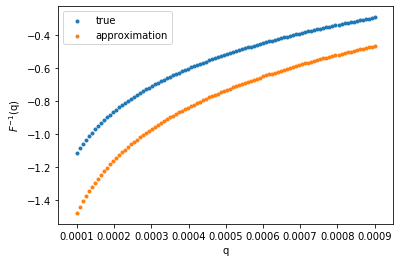

In [61]:
NIG_law = norminvgauss(2,1,2,3)
r1 = .0001
r2 = .0009
r0 = min( r1, r2, 1-r1, 1-r2)/2

q_arr = np.linspace(r1,r2,100)
Zq = stats.norm.ppf(q_arr)
Xq_approx = NIG_law.ppf_approx(Zq)
Xq_true = [NIG_law.ppf(q) for q in q_arr]
plt.scatter(q_arr, Xq_true,  label="true", marker='.')
plt.scatter(q_arr, Xq_approx,  label='approximation', marker='.')
plt.legend()
plt.ylabel(r"$F^{-1}$(q)")
plt.xlabel(r"q")
plt.xlim((r1-r0,r2+r0))

(0.99895, 0.99995)

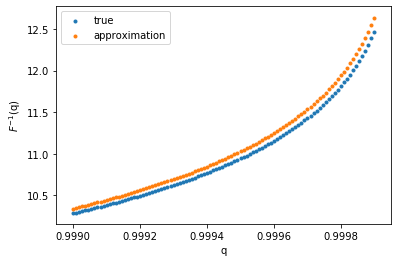

In [60]:
NIG_law = norminvgauss(2,1,2,3)
r1 = .9990
r2 = .9999
r0 = min( r1, r2, 1-r1, 1-r2)/2

q_arr = np.linspace(r1,r2,100)
Zq = stats.norm.ppf(q_arr)
Xq_approx = NIG_law.ppf_approx(Zq)
Xq_true = [NIG_law.ppf(q) for q in q_arr]
plt.scatter(q_arr, Xq_true,  label="true", marker='.')
plt.scatter(q_arr, Xq_approx,  label='approximation', marker='.')
plt.legend()
plt.ylabel(r"$F^{-1}$(q)")
plt.xlabel(r"q")
plt.xlim((r1-r0,r2+r0))